In [3]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [4]:
# Load data

df = pd.read_csv('/home/gerri/Documents/ShareFiles/Data Files/customer_churn_prediction_dataset.csv')

In [5]:
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
  customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  0001-XXXX    Male              0     Yes        Yes       5           No   
1  0002-XXXX  Female              0      No         No      42          Yes   
2  0003-XXXX    Male              0      No         No      61          Yes   
3  0004-XXXX    Male              1      No        Yes      22          Yes   
4  0005-XXXX    Male              1     Yes        Yes      21           No   

      MultipleLines InternetService       OnlineSecurity  ...  \
0               Yes              No                   No  ...   
1  No phone service             DSL                  Yes  ...   
2  No phone service              No                   No  ...   
3                No              No  No internet service  ...   
4                No             DSL                   No  ...   

      DeviceProtection TechSupport          StreamingTV      StreamingMovies  \
0                   No   

In [6]:
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
       SeniorCitizen      tenure  MonthlyCharges  TotalCharges
count     300.000000  300.000000      300.000000    300.000000
mean        0.543333   35.783333       67.226800   2477.975767
std         0.498951   21.113400       28.638073   1918.540111
min         0.000000    1.000000       18.450000     30.030000
25%         0.000000   17.000000       42.337500    910.302500
50%         1.000000   36.000000       68.635000   2072.400000
75%         1.000000   53.250000       92.430000   3618.405000
max         1.000000   72.000000      118.640000   8318.880000


In [7]:
print("\nData types and null values:")
print(df.info())


Data types and null values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        300 non-null    object 
 1   gender            300 non-null    object 
 2   SeniorCitizen     300 non-null    int64  
 3   Partner           300 non-null    object 
 4   Dependents        300 non-null    object 
 5   tenure            300 non-null    int64  
 6   PhoneService      300 non-null    object 
 7   MultipleLines     300 non-null    object 
 8   InternetService   300 non-null    object 
 9   OnlineSecurity    300 non-null    object 
 10  OnlineBackup      300 non-null    object 
 11  DeviceProtection  300 non-null    object 
 12  TechSupport       300 non-null    object 
 13  StreamingTV       300 non-null    object 
 14  StreamingMovies   300 non-null    object 
 15  Contract          300 non-null    object 
 16  PaperlessBillin

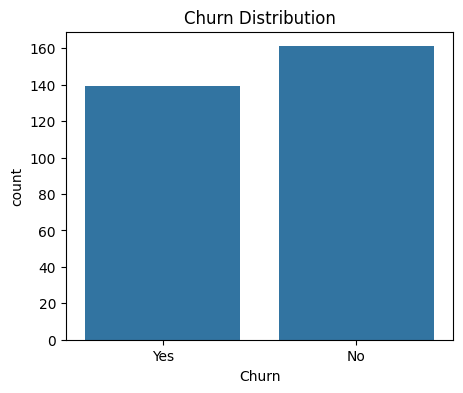

In [8]:
# Churn Distribution

plt.figure(figsize=(5,4))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

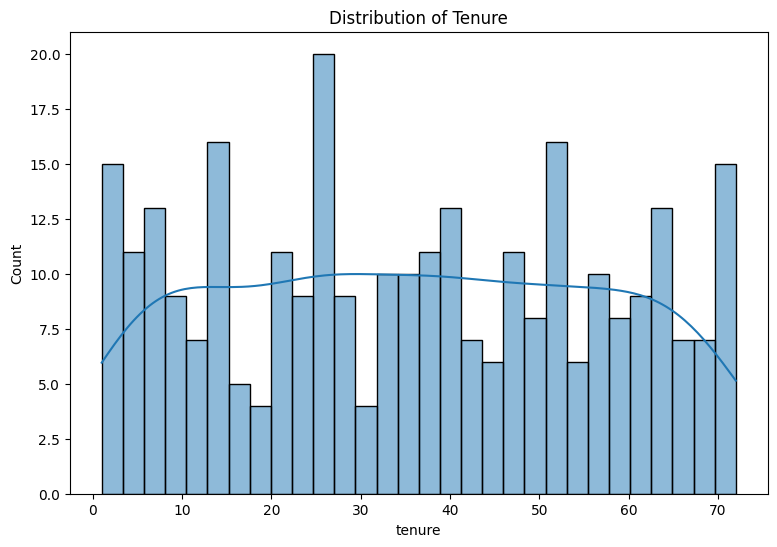

In [9]:
# Tenure distribution
plt.figure(figsize=(9,6))
sns.histplot(df['tenure'], bins=30, kde=True)
plt.title('Distribution of Tenure')
plt.show()

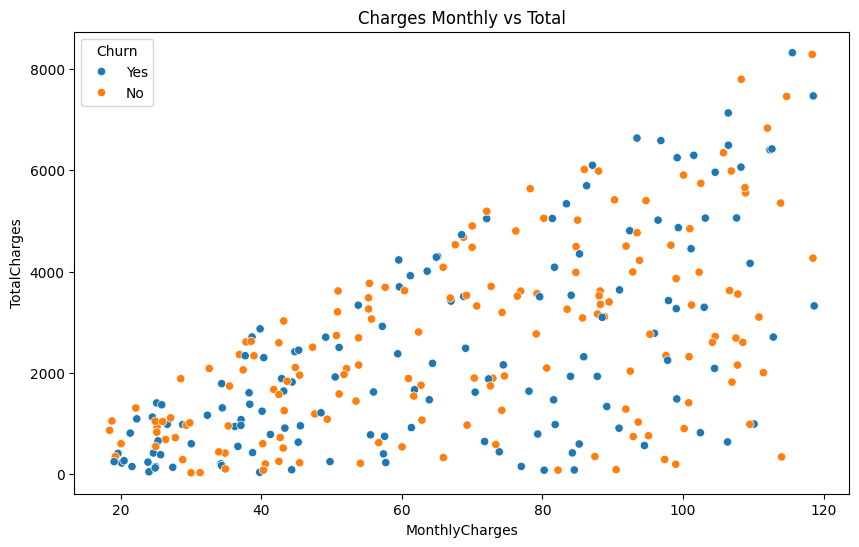

In [12]:
# Monthly Charges vs Total Charges

plt.figure(figsize=(10,6))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='Churn', data=df)
plt.title('Charges Monthly vs Total')
plt.show()

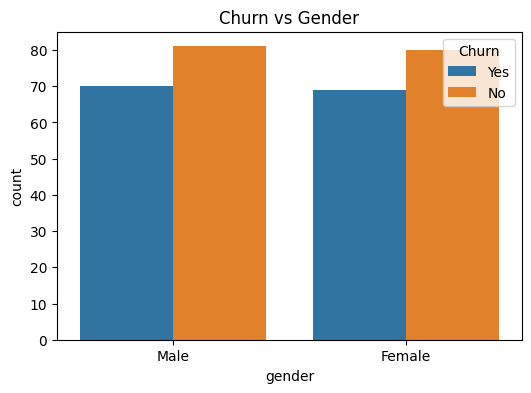

In [13]:
# Churn vs Gender

plt.figure(figsize=(6,4))
sns.countplot(x='gender', hue='Churn', data=df)
plt.title('Churn vs Gender')
plt.show()

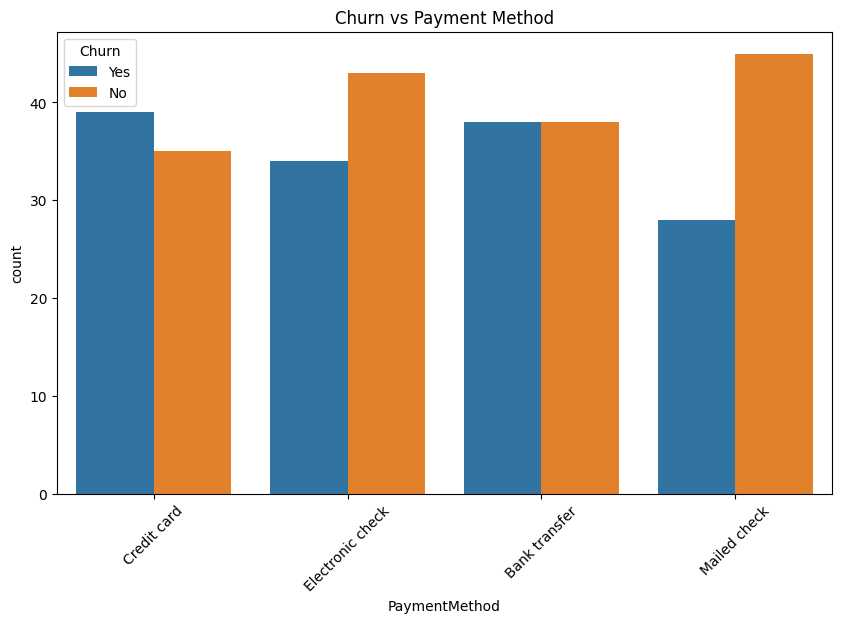

In [14]:
# Churn vs Payment Method

plt.figure(figsize=(10,6))
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title('Churn vs Payment Method')
plt.xticks(rotation=45)
plt.show()

In [16]:
# Convert 'TotalCharges' to numeric 

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [17]:
# Fill the missing values with the mode

df['TotalCharges'].fillna(df['TotalCharges'].mode()[0], inplace=True)

/tmp/ipykernel_60956/3103545590.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].mode()[0], inplace=True)


In [18]:
# Encode categorical variables

label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [19]:
# Drop target variable and features

X = df.drop(['customerID', 'Churn'], axis=1)
Y = df['Churn']

In [22]:
# Split the dataset

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [23]:
# Standardize the feature variables

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
# Train a Random Forest Classifier

rf_classifier = RandomForestClassifier(n_estimators=300, random_state=42, max_depth=3)
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(max_depth=3, n_estimators=300, random_state=42)

In [25]:
# Predict

Y_pred = rf_classifier.predict(X_test)

In [26]:
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.76      0.64        34
           1       0.38      0.19      0.26        26

    accuracy                           0.52        60
   macro avg       0.47      0.48      0.45        60
weighted avg       0.48      0.52      0.47        60



In [27]:
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))

Confusion Matrix:
[[26  8]
 [21  5]]


In [28]:
print("Accuracy Score:")
print(accuracy_score(Y_test, Y_pred))

Accuracy Score:
0.5166666666666667


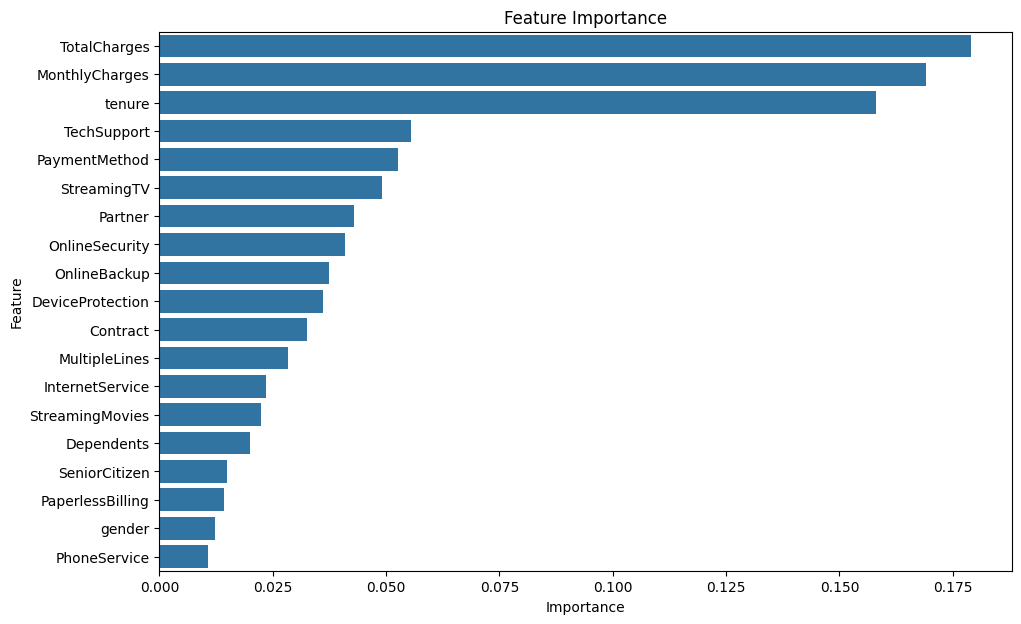

In [30]:
# Feature Importance

importance = rf_classifier.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(11,7))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()